# Part 1: About neural data

In [110]:
import mne
from mne.decoding import Vectorizer

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support

# Models
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import mne.viz

import numpy as np

In [2]:
data_file = '902_1_PDDys_ODDBALL_Clean_curated_new'

In [3]:
epochs = mne.read_epochs(data_file + '.fif', verbose='error')
data = epochs._data

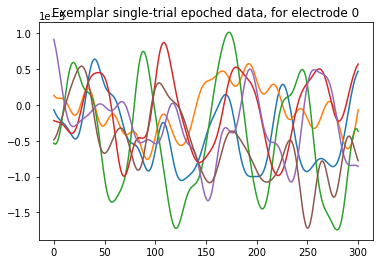

In [4]:
plt.plot(data[14:20,0,:].T)
plt.title("Exemplar single-trial epoched data, for electrode 0")
plt.show()

In [5]:
evoked = epochs.average()

In [6]:
evoked_data = evoked.data
n_channels = len(evoked_data) # or len(evoked.ch_names)
print("Number of channels: " + str(n_channels))

Number of channels: 60


In [7]:
n_times = len(evoked_data[0,:]) # or len(evoked.times)
print("Number of time instances: " + str(n_times))

Number of time instances: 301


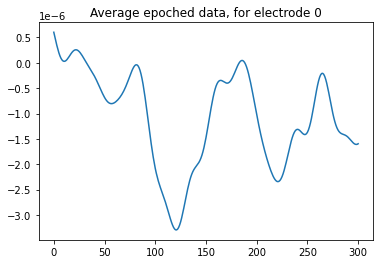

In [8]:
plt.plot(evoked._data[0,:].T)
plt.title("Average epoched data, for electrode 0")
plt.show()

In [9]:
%matplotlib tk

Using matplotlib as 2D backend.


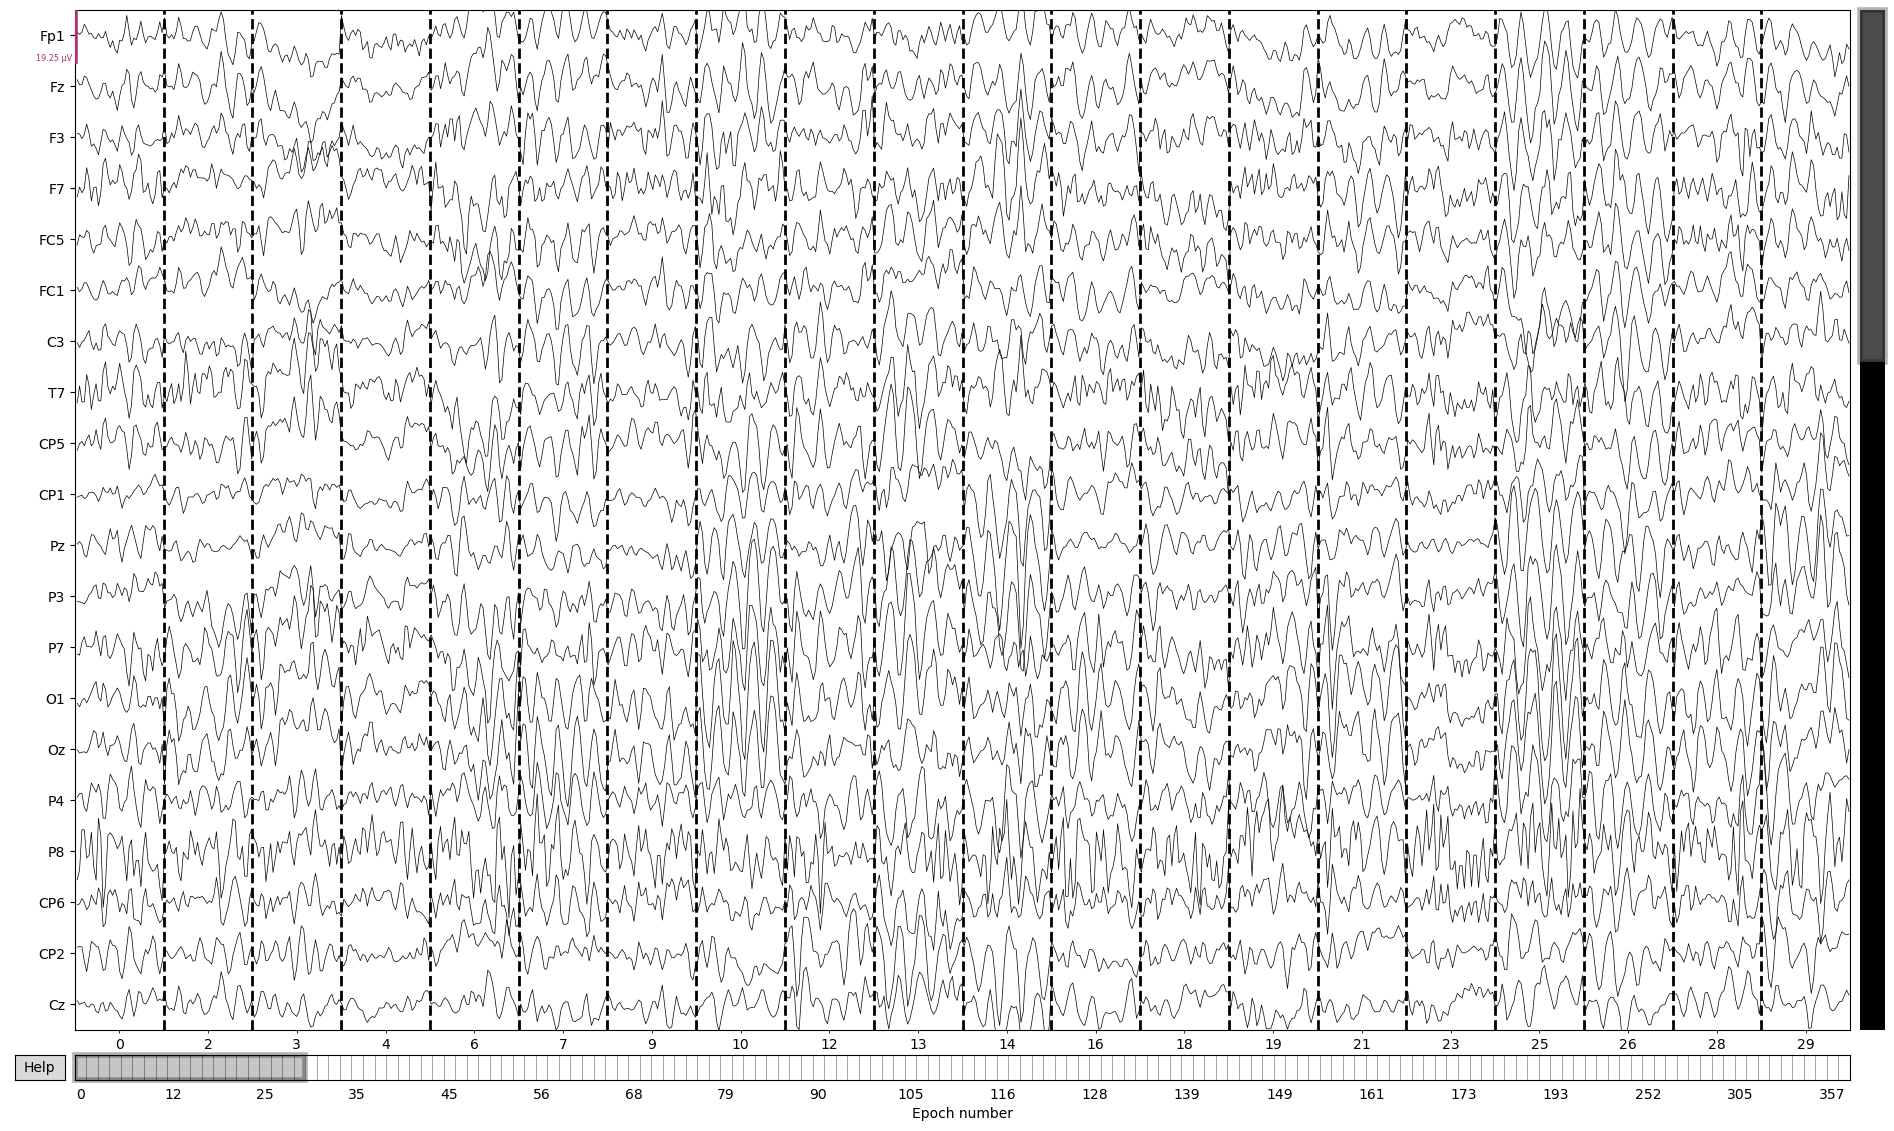

In [10]:
epochs.plot(scalings='auto')

In [11]:
%matplotlib inline

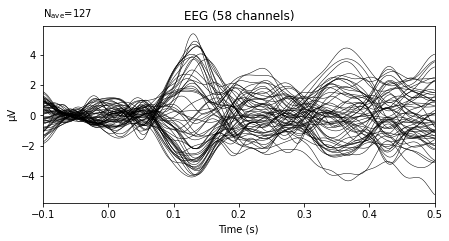

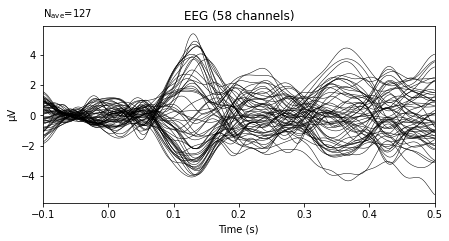

In [12]:
epochs['Standard'].average().plot()

At Fz electrode

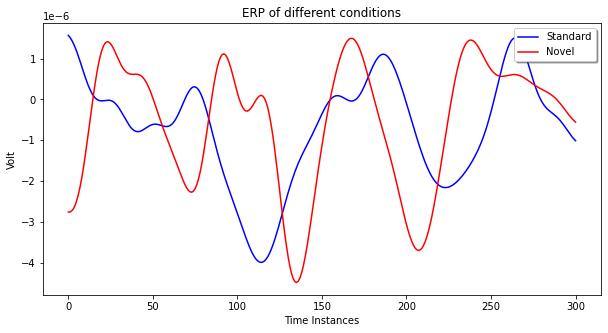

In [13]:
ep_std = epochs['Standard']
ep_nov = epochs['Novel']
ch = 1
conditions = ['Standard', 'Novel']

fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlabel('Time Instances')
ax.set_ylabel('Volt')

ax.plot(ep_std.average().data[ch, :], color='blue', label='Standard')
ax.plot(ep_nov.average().data[ch, :], color='red', label='Novel')

legend = ax.legend(loc='upper right', shadow=True, fontsize='medium')
plt.title('ERP of different conditions')
plt.show()

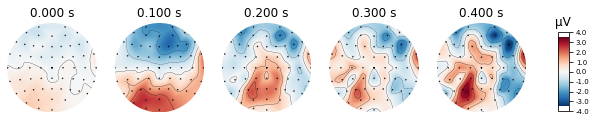

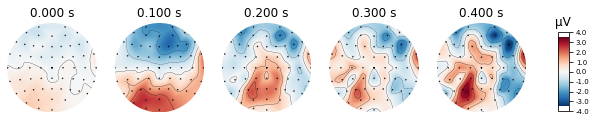

In [14]:
times = np.arange(0, 0.5, 0.1)
epochs.average().plot_topomap(times, ch_type='eeg')

In [15]:
import pylab, seaborn as sns
from scipy.stats import ttest_rel, sem

def plot_conditions(data, times, plot_title):

    sns.set(style="white")
    ColorsL = np.array(([228,26,28], [55,126,184], [77,175,74], [152,78,163], [255,127,0]))/256
    col_axes = np.array((82, 82, 82))/256

    al = 0.2
    fig = plt.figure(num=None, figsize=(4, 2), dpi=150)

    
    epochs_mean = np.mean(data, axis = 0)
    epochs_std = sem(data, axis = 0)/2

    plt.plot(times, epochs_mean, color = ColorsL[0], linewidth = 2)
    plt.fill_between(times, epochs_mean, epochs_mean + epochs_std, color = ColorsL[0], interpolate=True, alpha = al)
    plt.fill_between(times, epochs_mean, epochs_mean - epochs_std, color = ColorsL[0], interpolate=True, alpha = al)
    plt.ylabel('Mean ERP')
    plt.xlabel('Times')
    plt.title(plot_title)

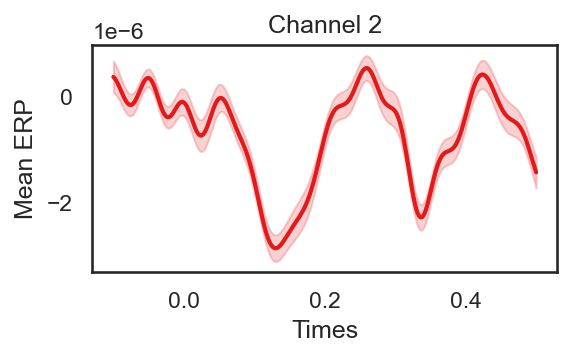

In [16]:
plot_conditions(epochs.get_data()[:,2,:], epochs.times, 'Channel 2')


In [17]:
import copy

In [18]:
original_1 = copy.deepcopy(epochs)
original_2 = copy.deepcopy(epochs)

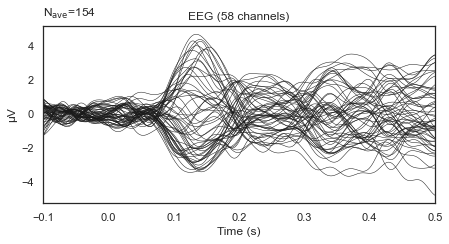

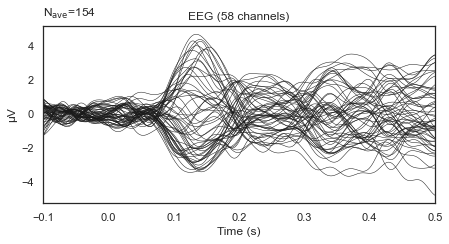

In [19]:
re_ref_epochs = original_1.set_eeg_reference('average', projection=True)

re_ref_epochs.average().plot()

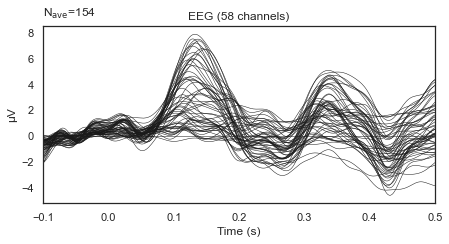

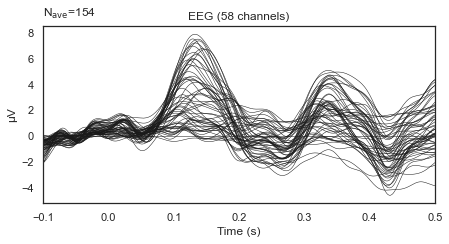

In [20]:
re_ref_epochs_2 = original_2.set_eeg_reference(['Fz'])
re_ref_epochs_2.average().plot()

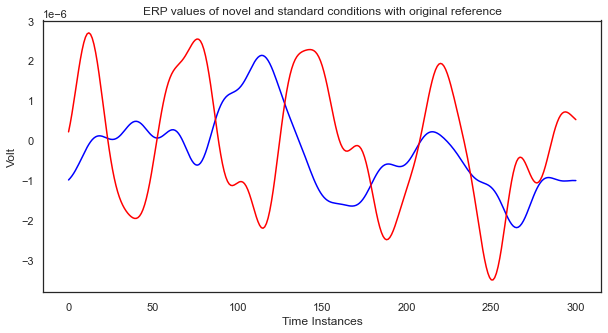

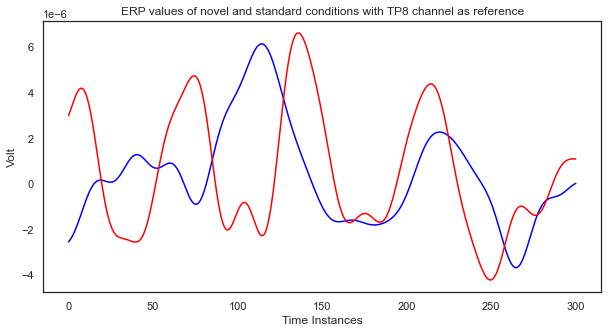

In [21]:
references = ['original', 'TP8']

#Data with original reference
st = epochs['Standard']
nv = epochs['Novel']

#Data with TP8 as the reference channel
st_2 = original_2['Standard']
nv_2 = original_2['Novel']
ch = 18 # channel index

for i in range(len(references)):
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_xlabel('Time Instances')
    ax.set_ylabel('Volt') 
    if references[i] == 'original': 
        plt.title('ERP values of novel and standard conditions with original reference')
        ax.plot(st.average().data[ch,:], color='blue')
        ax.plot(nv.average().data[ch,:], color='red')
    
    else:
        plt.title('ERP values of novel and standard conditions with TP8 channel as reference')
        ax.plot(st_2.average().data[ch,:], color='blue')
        ax.plot(nv_2.average().data[ch,:], color='red')

    plt.show()

Little projects:
 - decode identity
 - bias in the data (reference)

Get unfiltered data

Examples on two different dataset -> can choose which one, compare performance, 3 way classification for visual, pleasant vs. unpleasant vs. neutral / familiar vs. novel